# Dividir el dataset en conjunto de entrenamiento y de testing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [10]:
a = np.random.randn(len(data))

(array([ 3.,  5., 24., 40., 44., 33., 23., 17.,  7.,  4.]),
 array([-2.51305765, -1.99508807, -1.47711848, -0.95914889, -0.44117931,
         0.07679028,  0.59475987,  1.11272946,  1.63069904,  2.14866863,
         2.66663822]),
 <a list of 10 Patch objects>)

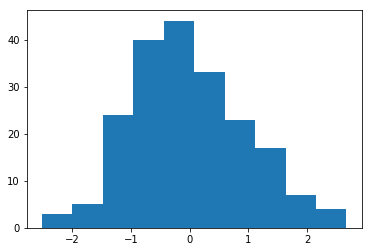

In [11]:
plt.hist(a)

In [16]:
#Dividmos conjunto de entrenamiento y de testing en 80-20%
check = a < 0.8
training = data[check]
testing = data[~check]

In [17]:
len(training),len(testing)

(160, 40)

In [18]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     749.8
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           4.67e-81
Time:                        11:30:29   Log-Likelihood:                -303.54
No. Observations:                 160   AIC:                             613.1
Df Residuals:                     157   BIC:                             622.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9419      0.317      9.284      0.000       2.316       3.568
TV             0.0447      0.002     29.717      0.000       0.042       0.048
Radio          0.1951      0.009     22.732      0.000       0.178       0.212
==============================================================================
Omnibus:                       18.258   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.825
Skew:                          -0.853   Prob(JB):                     3.01e-05
Kurtosis:                       3.463   Cond. No.                         429.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9419 + 0.0447 * TV + 0.1951 * Radio

## Validación del modelo con el conjunto de testing

In [20]:
sales_pred = lm.predict(testing)
sales_pred

6      11.910146
10      7.025811
11     17.213991
12     10.853809
24      8.182958
27     16.923993
40     16.337390
63     13.304490
69     21.190813
76      4.482300
79      9.625217
81     14.451991
83     14.679957
84     20.867812
89     17.172909
92     19.201687
94     10.470420
95     16.401299
98     24.134514
101    23.262991
116    11.949229
120    14.482111
130    10.700174
131    15.352269
132     8.624499
133    19.295478
136    11.695197
138     9.916161
144    10.126300
145     9.578781
153    18.339130
154    15.446697
159    12.414281
161    13.755014
168    17.167204
172     7.739318
179    12.289276
190    12.725775
195     5.369957
197    12.661840
dtype: float64

In [21]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

144.45752845580648

In [24]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.9759194127880335

In [26]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.14579741101553467